<a href="https://colab.research.google.com/github/sriharsha1718/ML-Projects/blob/main/Digit_Recognition_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

In [6]:
y_train.shape

(60000,)

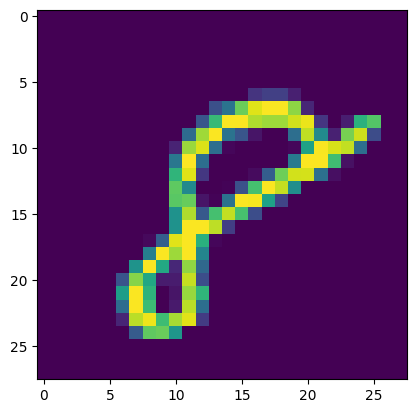

In [7]:
plt.imshow(X_train[59999])

In [8]:
y_train[59999]

8

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation = 'relu', kernel_regularizer = l2(0.005)))
model.add(Dense(32, activation = 'relu', kernel_regularizer = l2(0.005)))
model.add(Dense(10, activation = 'softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

In [14]:
history = model.fit(X_train,y_train,epochs=25, validation_split=0.3)

Epoch 1/25
1313/1313 [==============================] - 20s 14ms/step - loss: 0.7520 - accuracy: 0.8944 - val_loss: 0.5127 - val_accuracy: 0.9263
Epoch 2/25
1313/1313 [==============================] - 10s 8ms/step - loss: 0.4629 - accuracy: 0.9326 - val_loss: 0.4092 - val_accuracy: 0.9463
Epoch 3/25
1313/1313 [==============================] - 8s 6ms/step - loss: 0.4094 - accuracy: 0.9407 - val_loss: 0.3815 - val_accuracy: 0.9438
Epoch 4/25
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3773 - accuracy: 0.9455 - val_loss: 0.3684 - val_accuracy: 0.9474
Epoch 5/25
1313/1313 [==============================] - 10s 8ms/step - loss: 0.3512 - accuracy: 0.9501 - val_loss: 0.3450 - val_accuracy: 0.9507
Epoch 6/25
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3336 - accuracy: 0.9535 - val_loss: 0.3221 - val_accuracy: 0.9542
Epoch 7/25
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3188 - accuracy: 0.9542 - val_loss: 0.3141 - val_accur

In [15]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [16]:
y_prob

array([[1.0548124e-05, 1.5109085e-05, 6.7790468e-05, ..., 9.9946773e-01,
        8.7177688e-07, 2.4165641e-04],
       [2.7946749e-04, 3.7223104e-04, 9.9566466e-01, ..., 1.8225651e-07,
        1.6259453e-03, 2.8539813e-09],
       [1.6396007e-05, 9.9241757e-01, 4.3613533e-04, ..., 1.2780713e-03,
        2.8238753e-03, 1.3504345e-04],
       ...,
       [1.2718486e-07, 2.5054876e-05, 2.3229154e-08, ..., 5.6539953e-05,
        9.2973140e-05, 4.1563492e-03],
       [1.0394856e-04, 1.2856025e-04, 8.2891847e-07, ..., 7.9376650e-06,
        3.9377366e-03, 3.6702688e-05],
       [2.4876321e-05, 5.5330311e-08, 8.9511886e-06, ..., 1.4066557e-09,
        4.6981295e-06, 2.6404246e-07]], dtype=float32)

In [17]:
y_pred = y_prob.argmax(axis=1)

In [18]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9603